In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#importing warnings to suppress wherever required
import warnings
warnings.filterwarnings("ignore")

In [15]:
a=pd.read_csv("D:/Fliprobo/Time Series/Time Series Company/Company Stock and Investment.csv")
stock=pd.DataFrame(a)
stock.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [16]:
stock['Date']=pd.to_datetime(stock['Date'],format='%d-%m-%Y')
stock

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [17]:
#Lets consider the oil investments as our target and dropping all others
stock.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

#setting date as my index column
stock.set_index('Date',inplace=True)
stock.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-01-04,0.026830
2010-01-05,0.002699
2010-01-06,0.021688
2010-01-07,-0.006256


In [18]:
#function to check data stationarity
def adfuller_test(target):
    result=adfuller(target) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [19]:
adfuller_test(stock['Oil Investments'])

ADF Test Statistic : -45.94216292983994
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [20]:
# average the daily stock value of oil investment for each month 
y = stock['Oil Investments'].resample('MS').mean()
y['2010':]

Date
2010-01-01   -0.003889
2010-02-01    0.005004
2010-03-01    0.002077
2010-04-01    0.001572
2010-05-01   -0.006981
                ...   
2017-07-01   -0.044539
2017-08-01   -0.002489
2017-09-01    0.004568
2017-10-01    0.002403
2017-11-01    0.001612
Freq: MS, Name: Oil Investments, Length: 95, dtype: float64

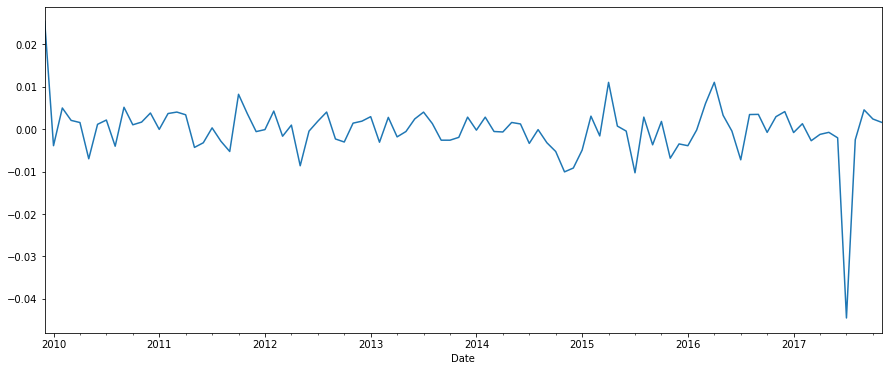

In [22]:
y.plot(figsize = (15, 6))

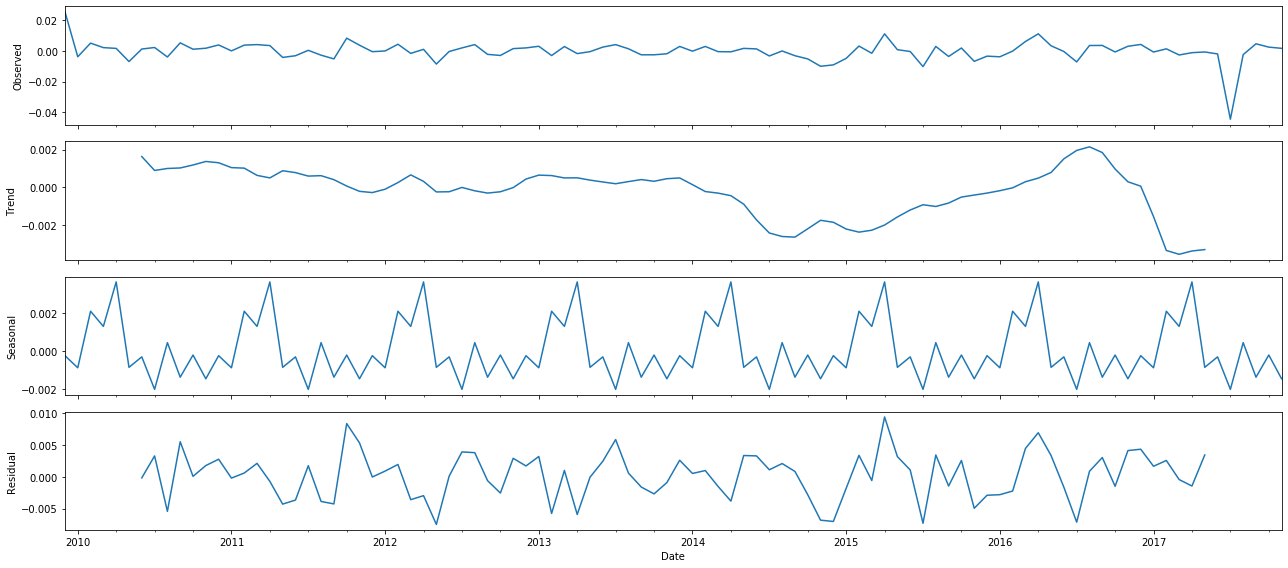

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [24]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-690.7010385107903
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-694.9512476802697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-599.8084292817435
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-600.2680602108874
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-697.3337493860186
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-695.4661230457682
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-599.7534432233562
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-596.5269513075458
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-689.4210774010609
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-693.2986900096009
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-598.6982484872279
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-599.7678500791756
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-695.8689880216991
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-693.0950591082619
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-599.2153810452439
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-595.2099915032938
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-633.1612599681108
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-636.746486

In [26]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),seasonal_order = (1, 0, 0, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0208      0.144     -0.145      0.885      -0.302       0.261
ma.L1         -0.8080      0.073    -11.039      0.000      -0.951      -0.665
ar.S.L12       0.4400      0.157      2.810      0.005       0.133       0.747
sigma2      4.125e-05   3.91e-06     10.546      0.000    3.36e-05    4.89e-05


In [27]:
#getting prediction according to the results
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Oil Investments,upper Oil Investments
Date,,
2017-01-01,-0.011612,0.013563
2017-02-01,-0.010221,0.014954
2017-03-01,-0.007691,0.017484
2017-04-01,-0.006809,0.018366
2017-05-01,-0.011564,0.013612
2017-06-01,-0.013624,0.011551
2017-07-01,-0.016802,0.008373
2017-08-01,-0.019021,0.006155
2017-09-01,-0.019024,0.006151


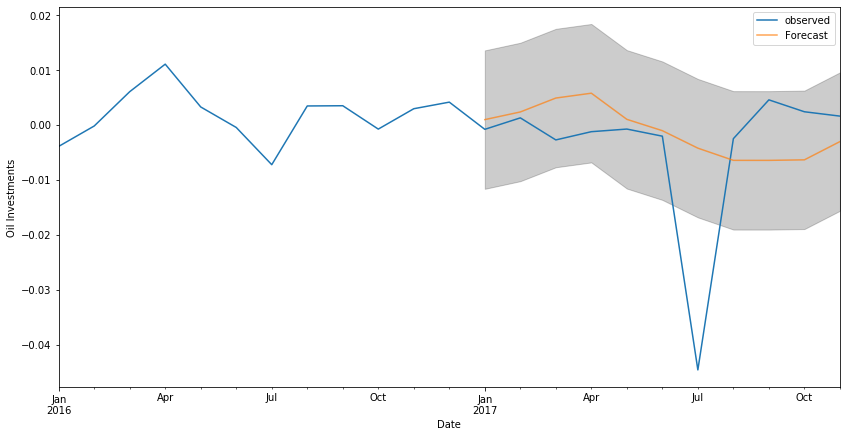

In [30]:
#Visualize the forecasting
ax = y['2016':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Oil Investments')
plt.legend()
plt.show()

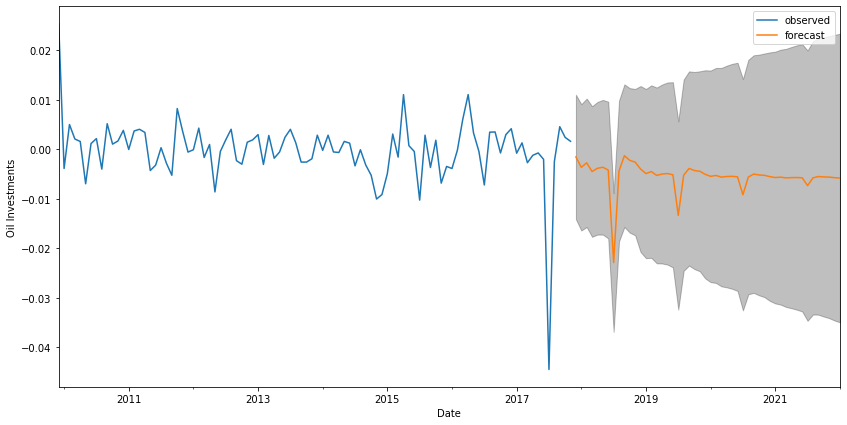

In [31]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Investments')

plt.legend()
plt.show()